# Script for generating the data distribution plots for YCB

In [30]:
import numpy as np
from os import path
import os 

import sys
sys.path.append("../..")

In [31]:
# Class list names 
class_names = ["Cracker box", 
               "Sugar Box", 
               "Mustard bottle", 
               "Potted meat can", 
               "Banana", 
               "Strawberry", 
               "Apple", 
               "Lemon", 
               "Peach", 
               "Plum", 
               "Bleach cleanser", 
               "Bowl", 
               "Mug", 
               "Duvel bottle", 
               "Liefman bottle", 
               "Wood bowl"]

In [32]:
# Hyper-parameters 
nb_classes = 16
joint_dist_lim = 0.009
data_set_folder = path.abspath(path.join("..", "generations/DATA_SET_YCB_filtered"))

In [33]:
def load_norm_data_buckets(data_set_loc_str, nb_classes,  lim): 
    x_min = -0.15
    x_max = 0.15
    y_min = -0.15
    y_max = 0.15 
    z_min = 0.13
    z_max = 0.35
    gripper_min = 0 
    gripper_max = 0.041664

    
    norm_metrics_buckets = [] 
    norm_hand_infos_buckets  = []
    for index in range(nb_classes): 
        norm_metrics_buckets.append([])
        norm_hand_infos_buckets.append([])
    
    bucket_counters = np.zeros(nb_classes, dtype=int)
    
    # Counter for the filtered data samples 
    nb_OK_samples = 0 
    nb_failure_samples = 0 
    
    # Loading the data from all files 
    for filename in os.listdir(data_set_loc_str): 
        file_data = np.load(data_set_loc_str + "/" + filename)
        
        file_metrics = file_data["metric"].astype(np.float64)
        file_hand_info = file_data["hand"].astype(np.float64)
        file_obj_classes = file_data["obj"].astype(np.float64)
        
        for metric_index in range(len(file_metrics)):
            if file_metrics[metric_index, 0] == 1.0 and file_metrics[metric_index,1] > lim:
                curr_class = int(file_obj_classes[metric_index,0])
                
                # Normalizing data 
                # only taking joint distance 
                norm_metrics_buckets[curr_class].append((file_metrics[metric_index,1] - gripper_min) / (gripper_max - gripper_min))
                tmp_hand_info = file_hand_info[metric_index]
                tmp_hand_info[0] = (tmp_hand_info[0] - x_min) / (x_max - x_min)
                tmp_hand_info[1] = (tmp_hand_info[1] - y_min) / (y_max - y_min)
                tmp_hand_info[2] = (tmp_hand_info[2] - z_min) / (z_max - z_min)
                
                norm_hand_infos_buckets[curr_class].append(tmp_hand_info)
                
                # Increasing the appropriate counter 
                bucket_counters[int(file_obj_classes[metric_index, 0])] += 1 
                
                nb_OK_samples += 1 
            else: 
                nb_failure_samples += 1 

        
    
    return norm_metrics_buckets, norm_hand_infos_buckets, bucket_counters, nb_OK_samples, nb_failure_samples

In [34]:
norm_metrics_buckets, norm_hand_infos_buckets, bucket_counters, nb_OK_samples, nb_failure_samples = load_norm_data_buckets(data_set_folder, nb_classes, joint_dist_lim)

Computing some metrics 

In [35]:
nb_nz_samp_per_class = []
for index in range(nb_classes): 
    nb_nz_samp_per_class.append(len(norm_metrics_buckets[index]))

In [36]:
print(nb_nz_samp_per_class)

[1865, 3080, 3802, 2132, 3101, 2511, 1602, 1928, 1918, 2122, 1423, 13349, 8601, 4062, 3886, 6236]


In [44]:
print(max(nb_nz_samp_per_class))
print(min(nb_nz_samp_per_class))
print(sum(nb_nz_samp_per_class))
print(sum(nb_nz_samp_per_class)/18000000 *100)

13349
1423
61618
0.3423222222222222


# Plots 

In [37]:
best_font_size = 20

In [38]:
# Importing packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


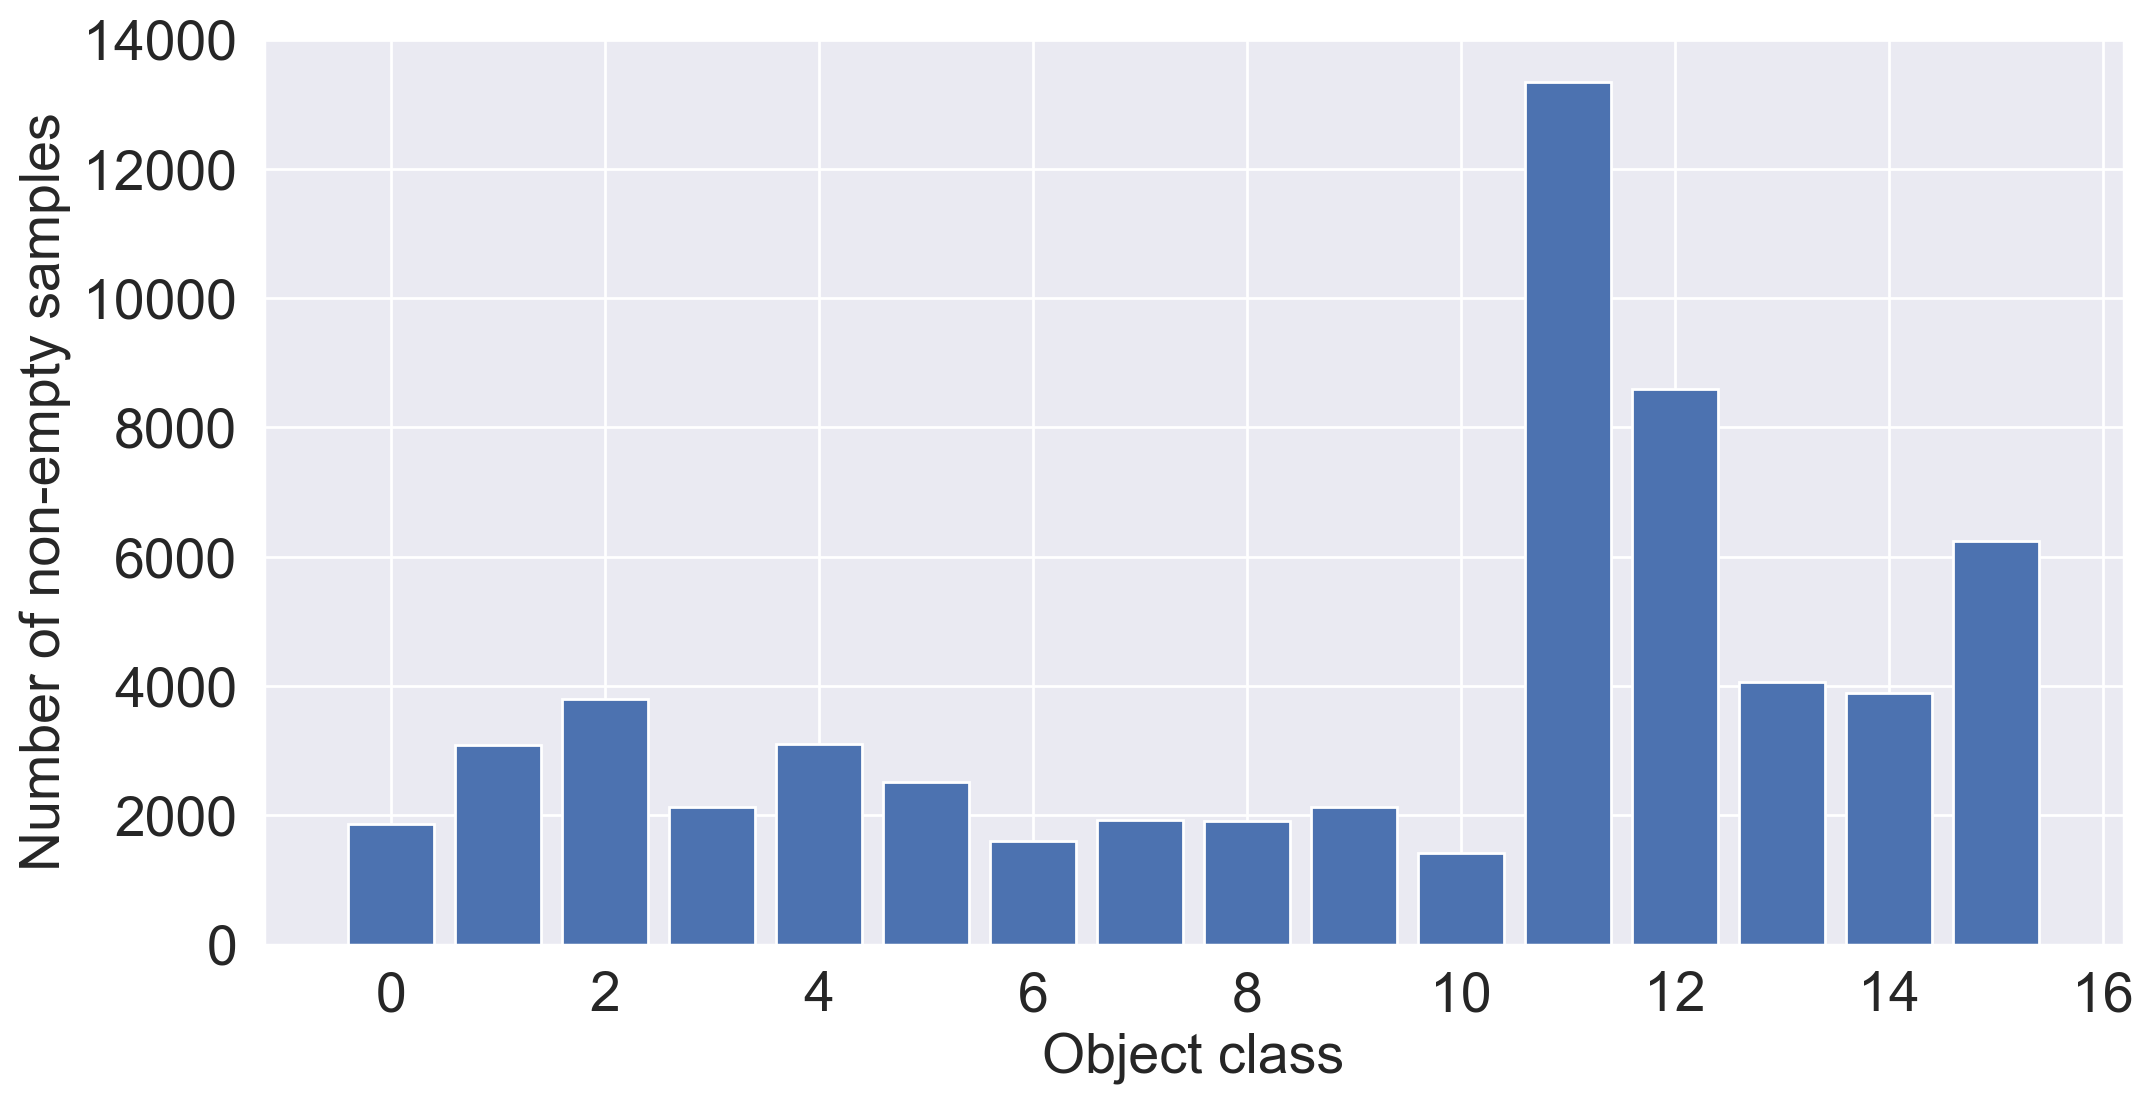

In [41]:
# Histogram: 
plt.figure(figsize=(12, 6), dpi=200)
plt.bar(range(nb_classes), nb_nz_samp_per_class)
plt.xlabel("Object class", Fontsize = best_font_size)
plt.ylabel("Number of non-empty samples", Fontsize = best_font_size)
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.savefig(path.abspath(path.join("..", "Figures/Data/FINAL_YCB_data_set_nzo/histo_all_classes_nzo_grasps.png")))
plt.show()

In [25]:
# Creating the directories (ONLY EXECUTE ONCE!)
for index in range(nb_classes): 
    path = r"C:\Users\phili\Documents\GitHub\DexterousManipulation\Figures\Data\FINAL_YCB_data_set_nzo\class_" + str(index)
    os.mkdir(path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\phili\\Documents\\GitHub\\DexterousManipulation\\Figures\\Data\\FINAL_YCB_data_set_nzo\\class_0'

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


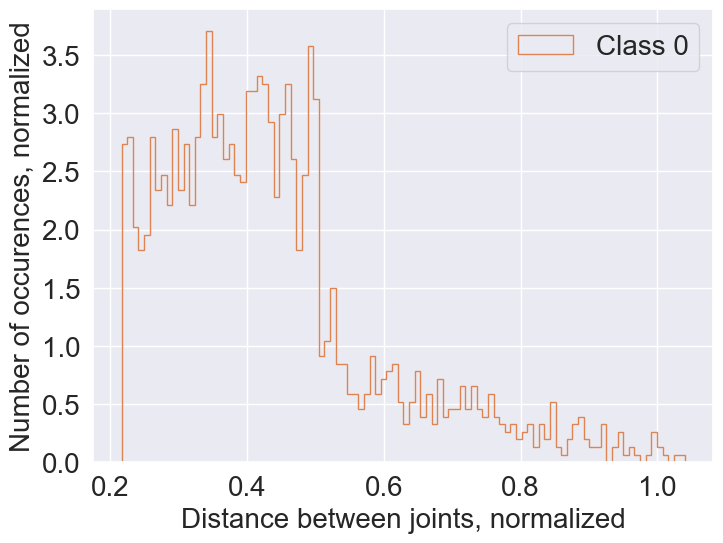

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


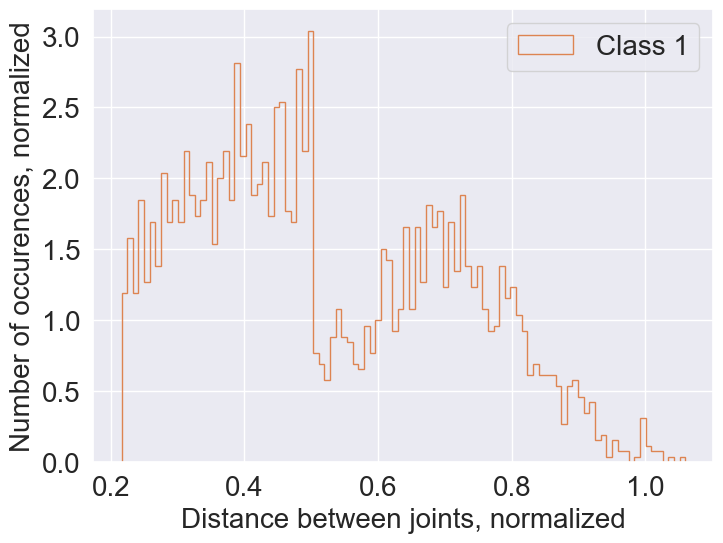

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


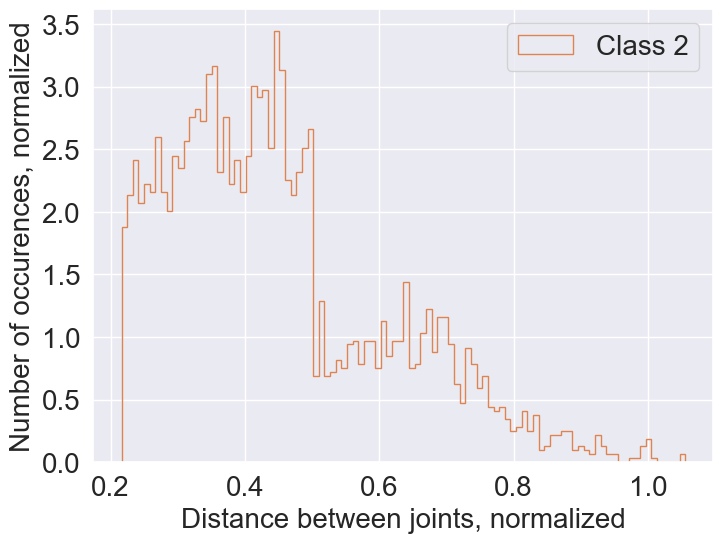

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


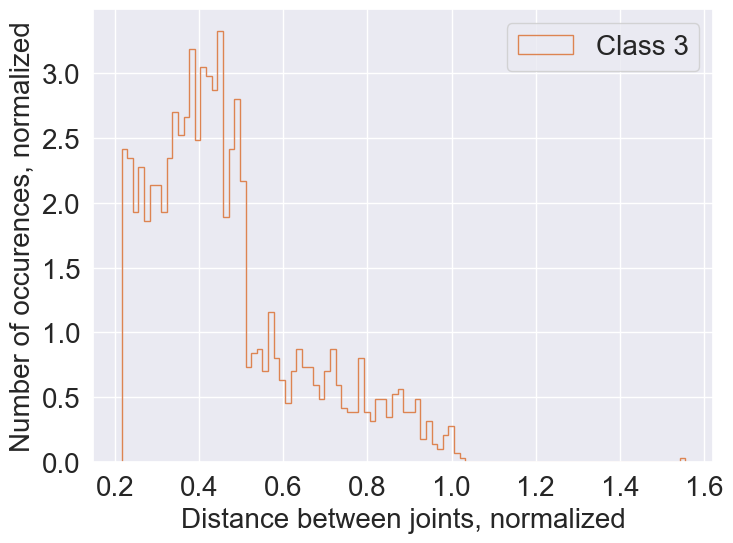

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


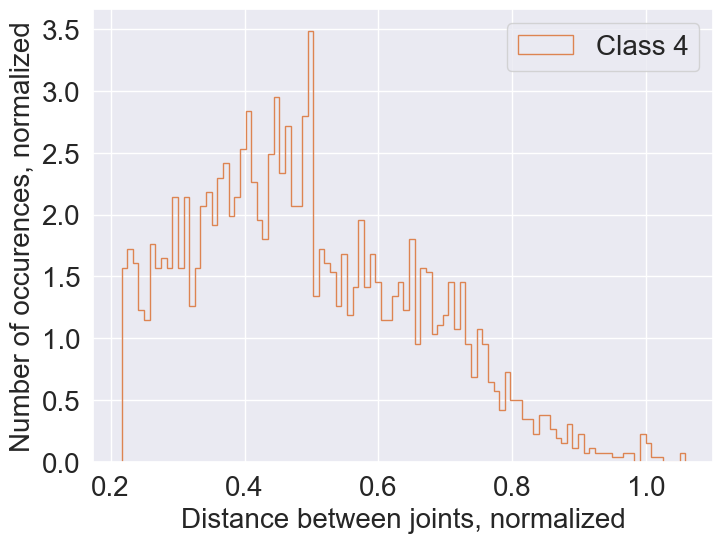

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


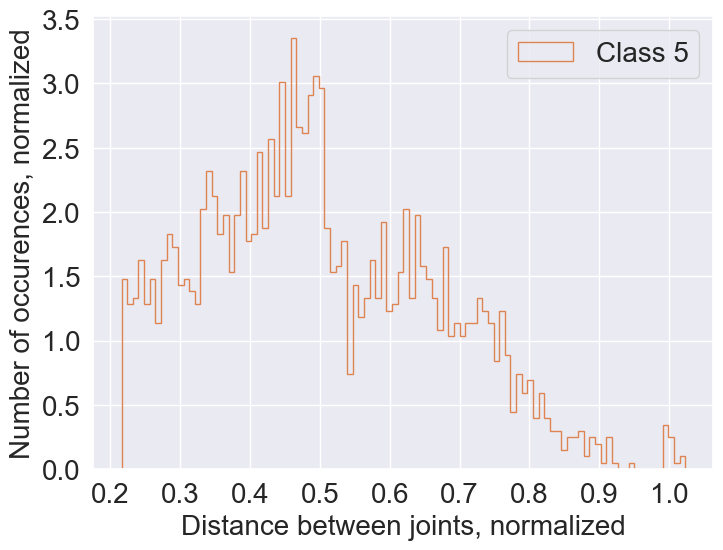

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


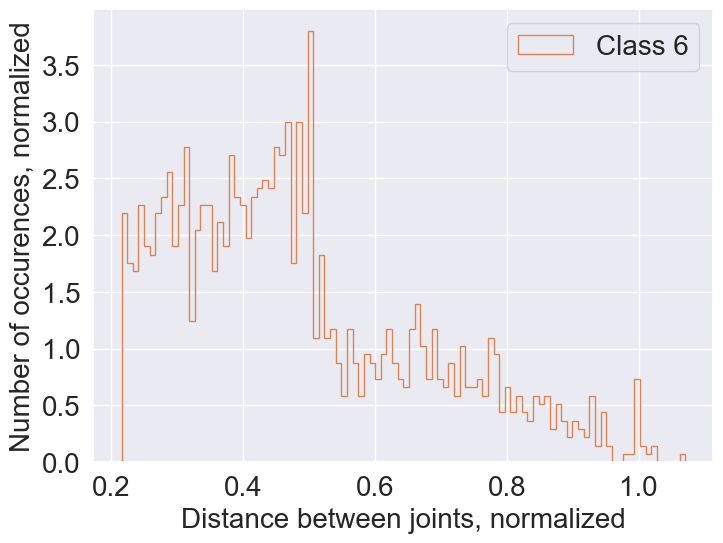

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


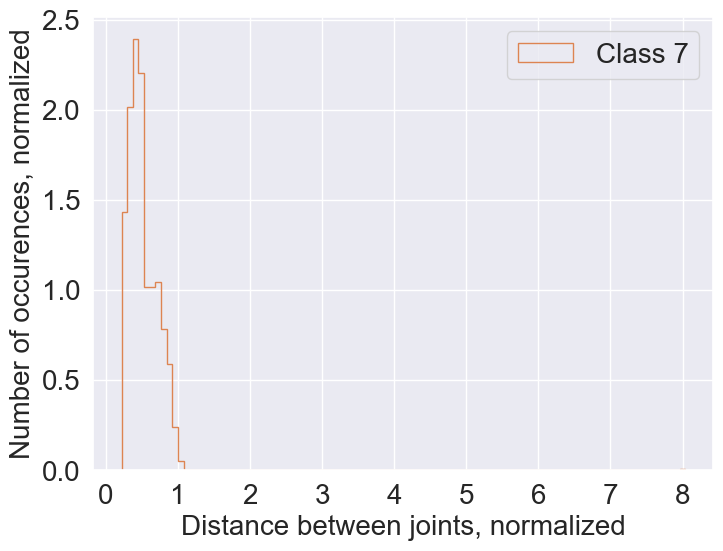

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


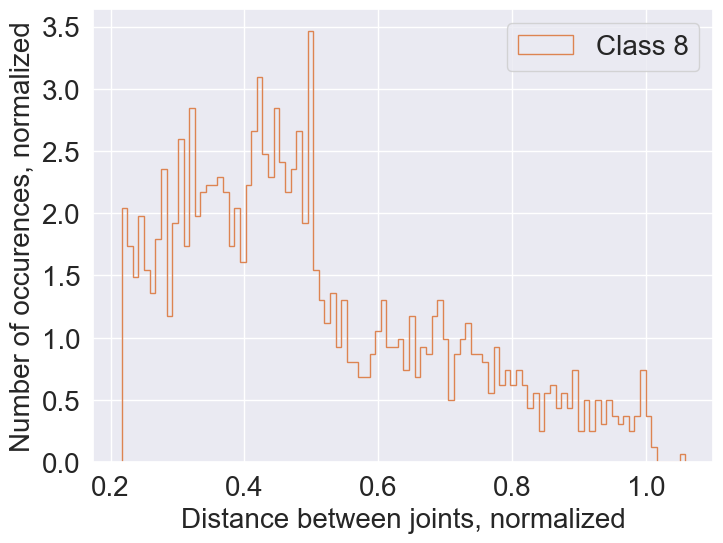

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


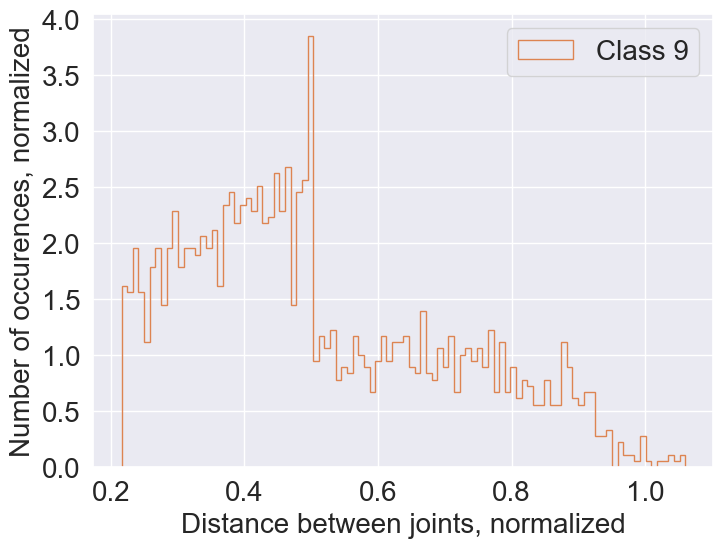

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


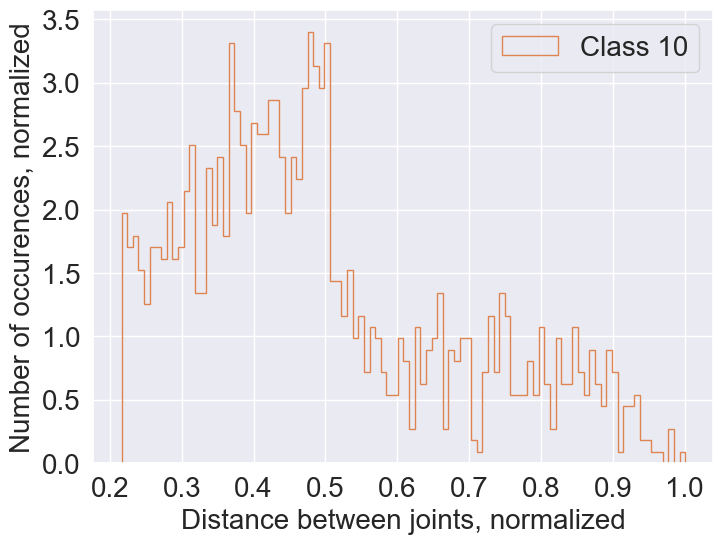

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


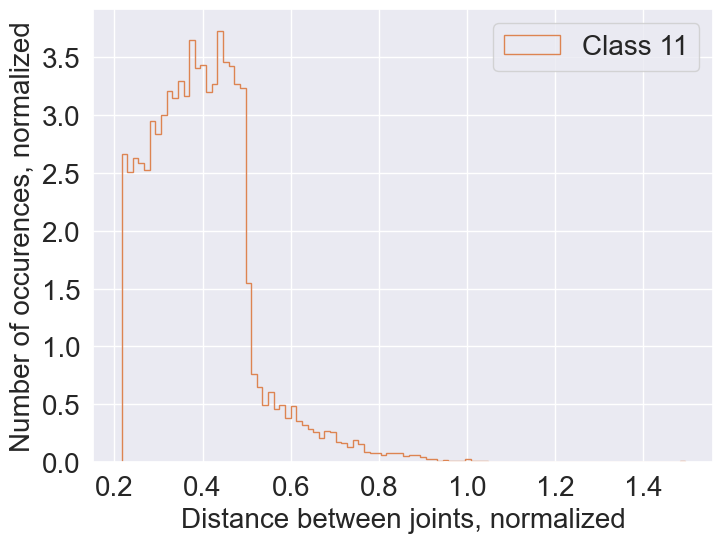

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


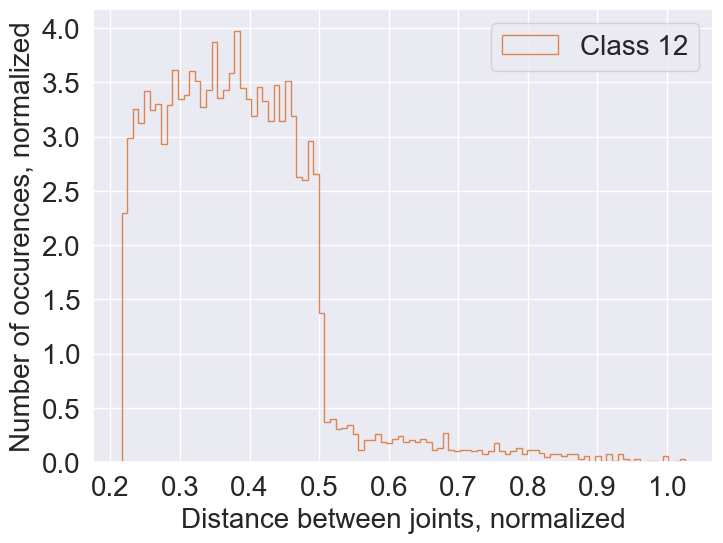

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


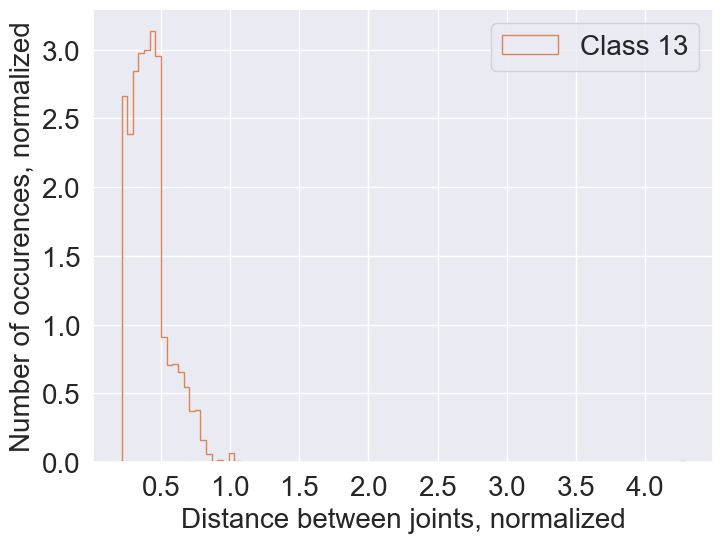

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


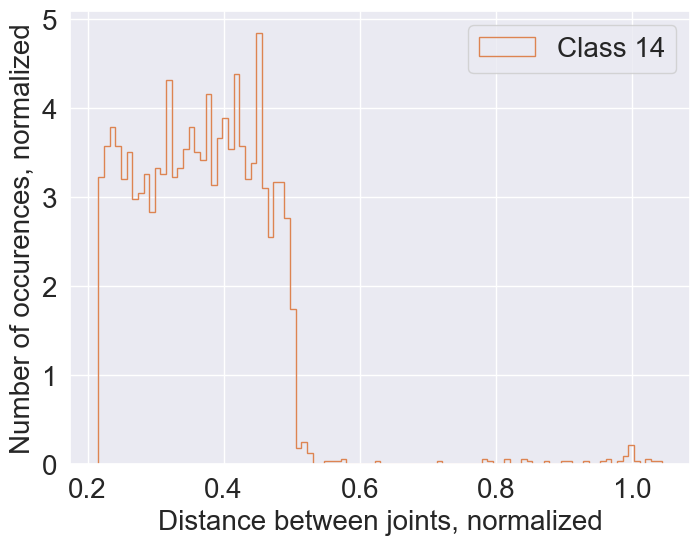

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


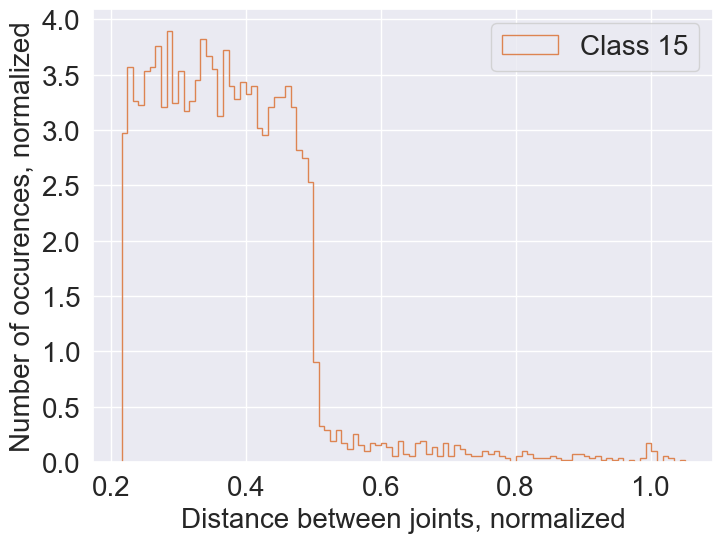

In [28]:
for class_index in range(nb_classes): 
    class_saving_str = r"C:\Users\phili\Documents\GitHub\DexterousManipulation\Figures\Data\FINAL_YCB_data_set_nzo\class_" + str(class_index)

    num_bins = 100 # for histogram 
    
    # Histogram: Small vs Big Cube
    plt.figure(figsize=(8, 6), dpi=100)
    plt.hist(np.asarray(norm_metrics_buckets[class_index]), bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
    plt.xlabel("Distance between joints, normalized", Fontsize = best_font_size)
    plt.ylabel("Number of occurences, normalized", Fontsize = best_font_size)
    plt.xticks(fontsize=best_font_size)
    plt.yticks(fontsize=best_font_size)
    # plt.title("Comparing class distributions")
    #create legend
    # handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2"]]
    labels= ["Class " + str(class_index)]
    plt.legend(labels, prop={"size":best_font_size})
    plt.savefig(class_saving_str + "_histogram_joint_dist.png")
    plt.show()

Class: 0: Cracker box


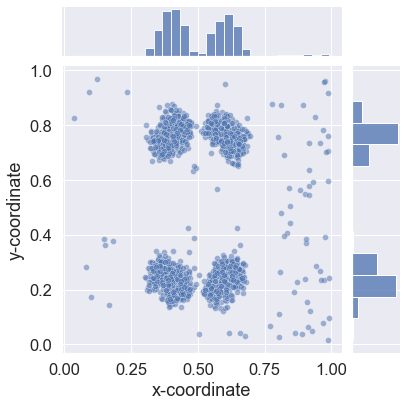

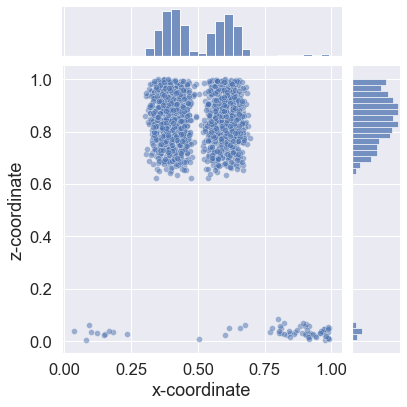

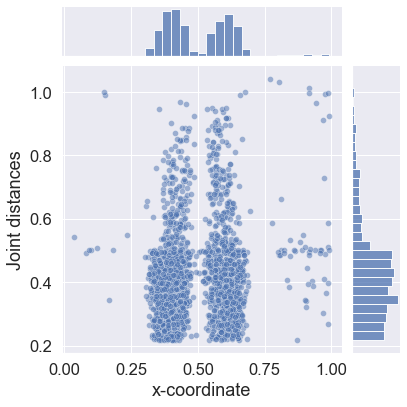

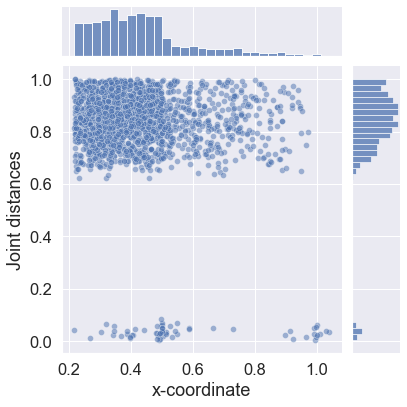

Class: 1: Sugar Box


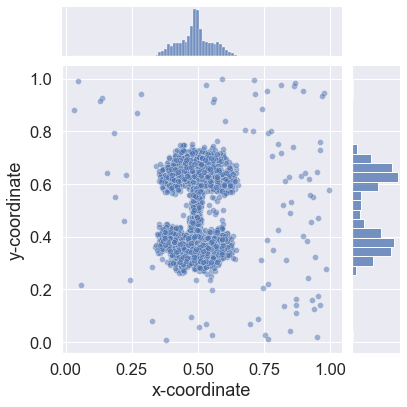

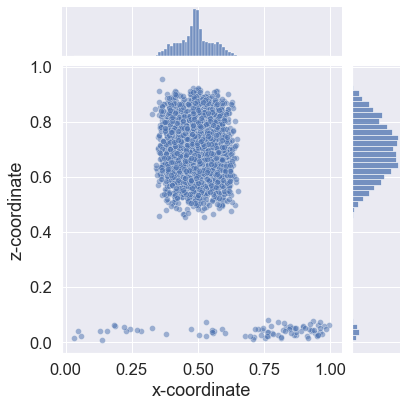

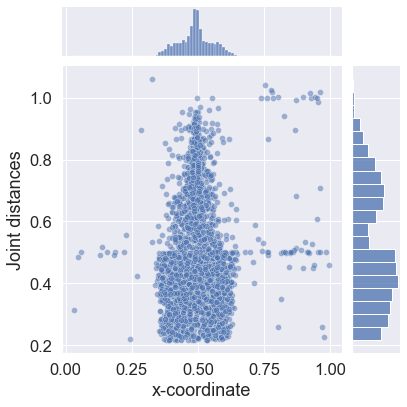

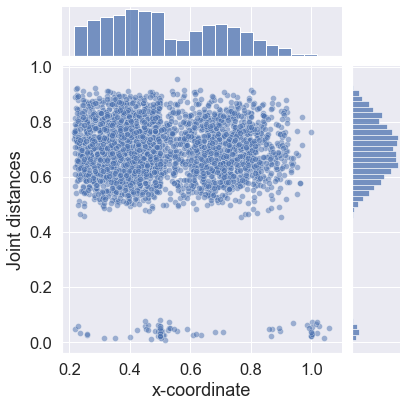

Class: 2: Mustard bottle


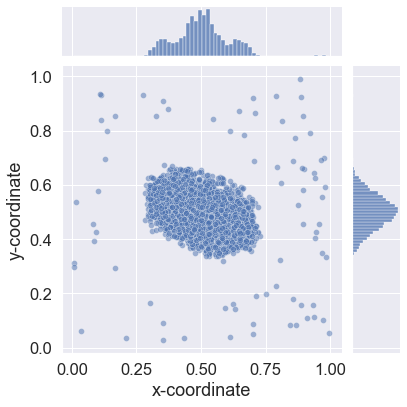

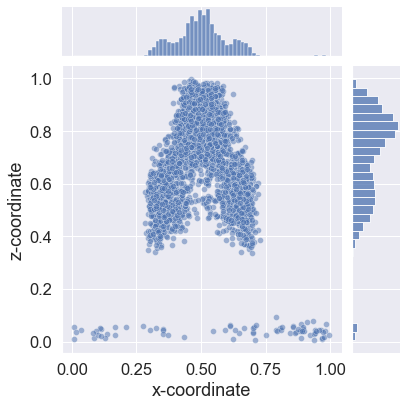

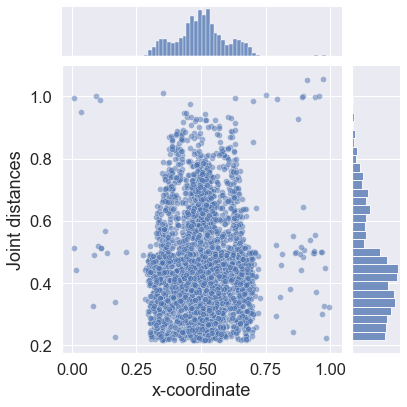

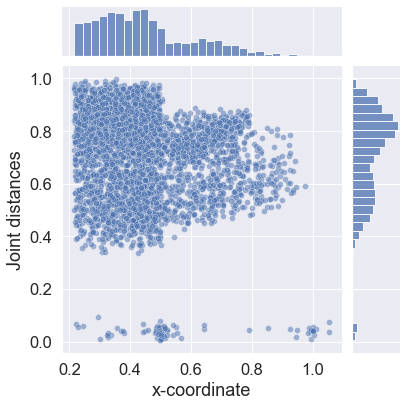

Class: 3: Potted meat can


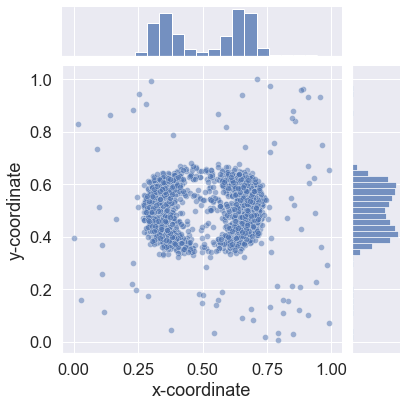

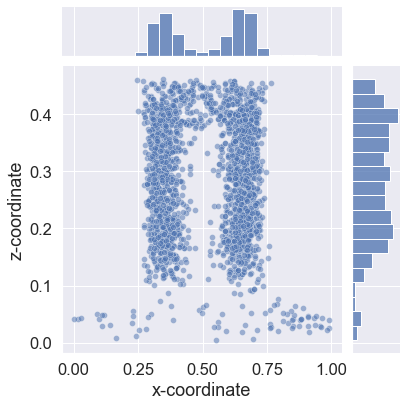

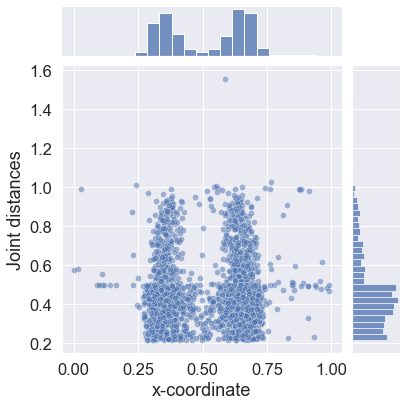

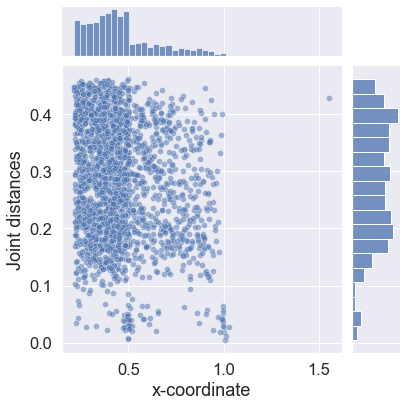

Class: 4: Banana


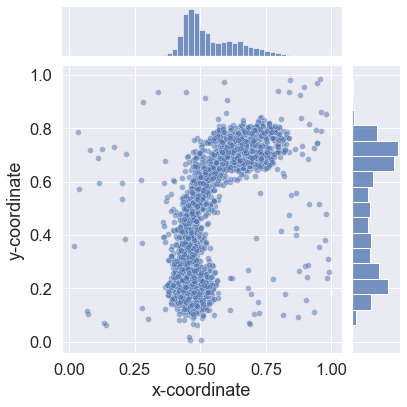

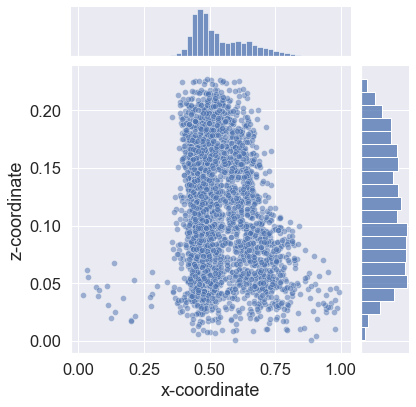

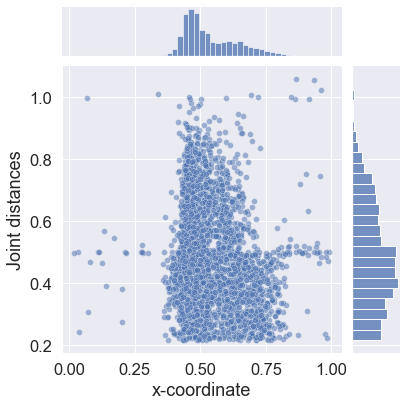

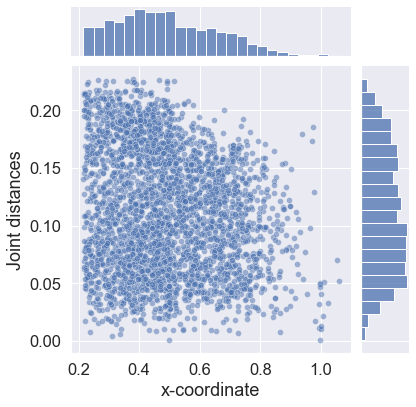

Class: 5: Strawberry


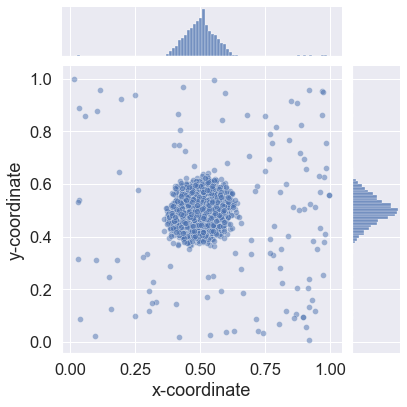

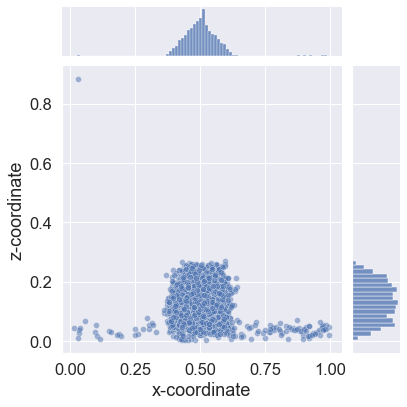

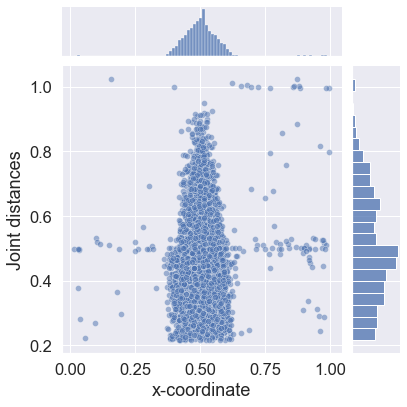

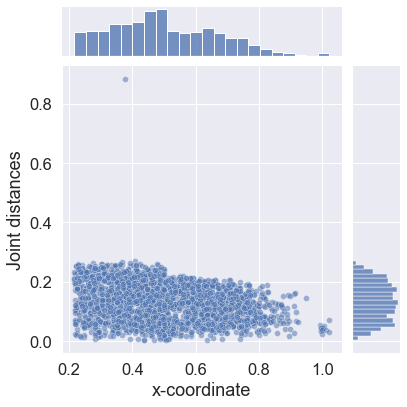

Class: 6: Apple


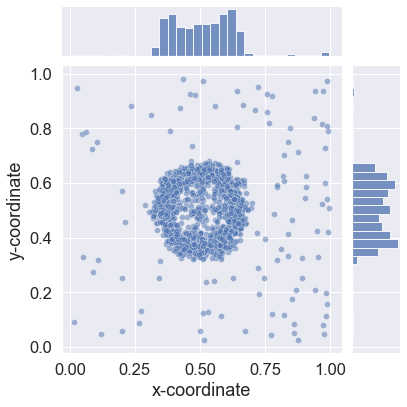

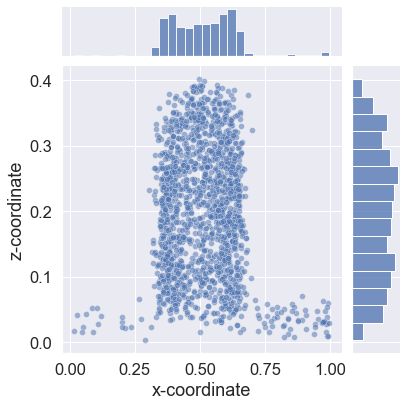

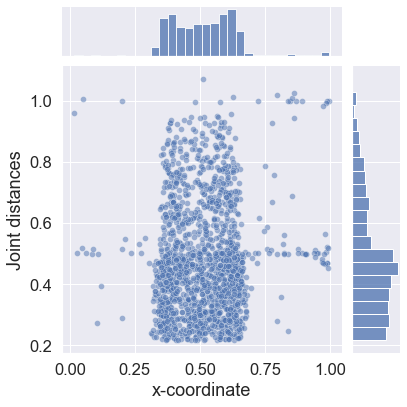

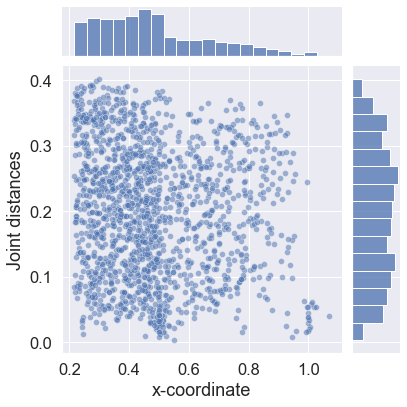

Class: 7: Lemon


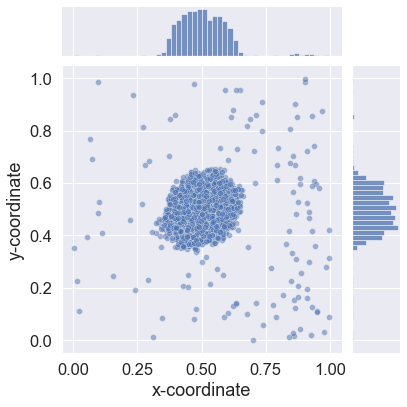

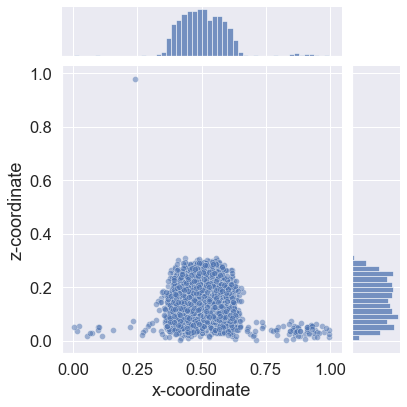

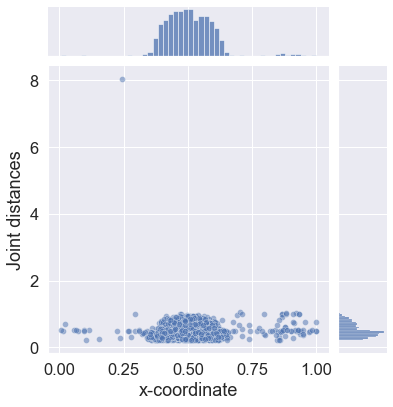

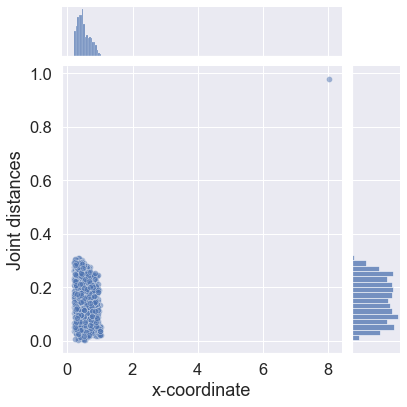

Class: 8: Peach


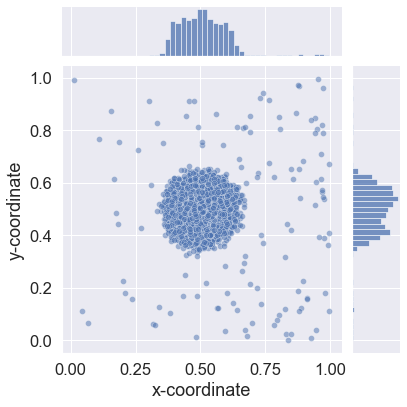

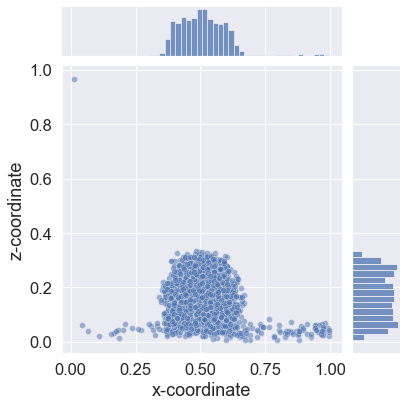

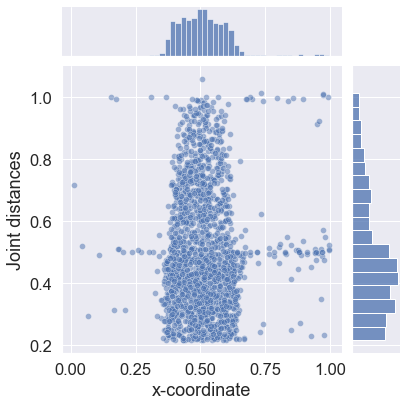

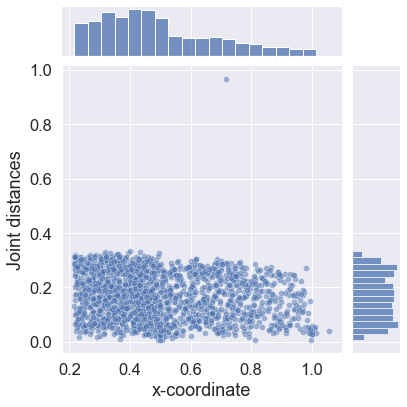

Class: 9: Plum


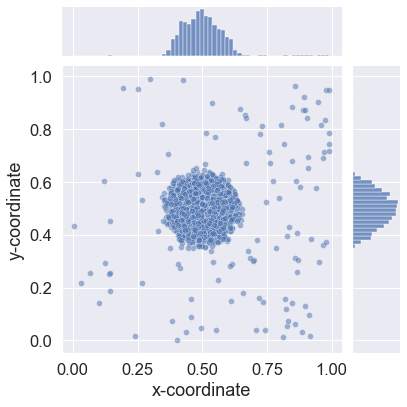

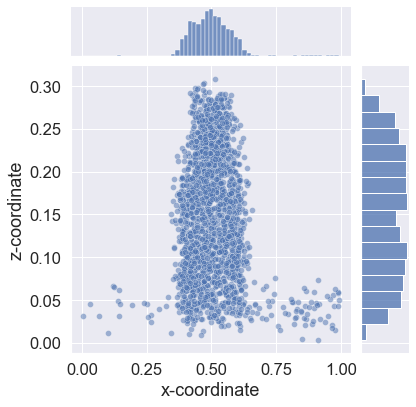

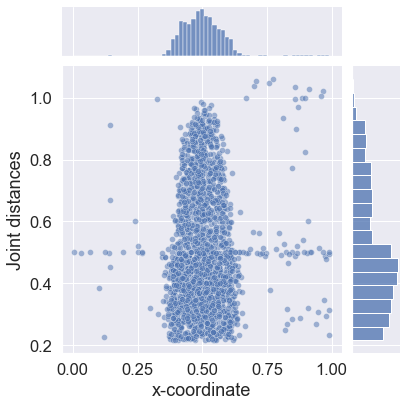

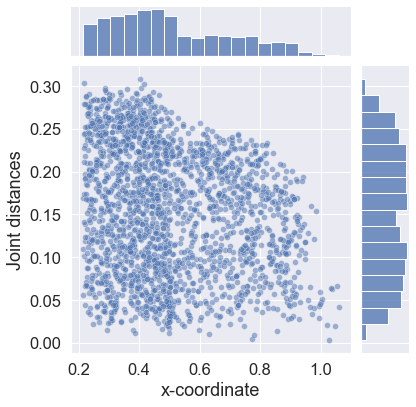

Class: 10: Bleach cleanser


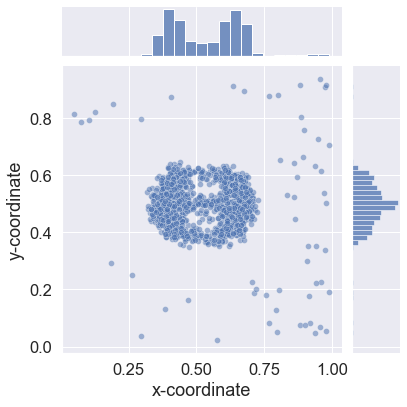

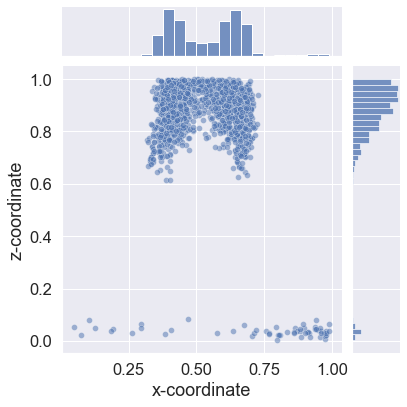

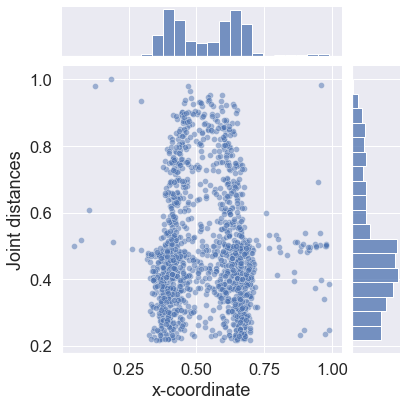

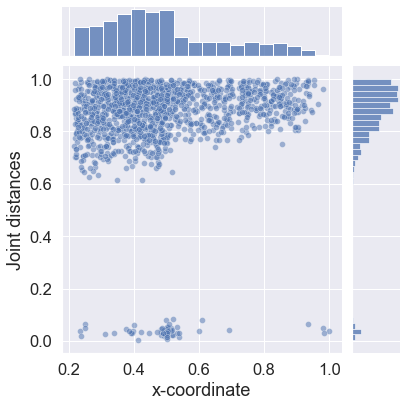

Class: 11: Bowl


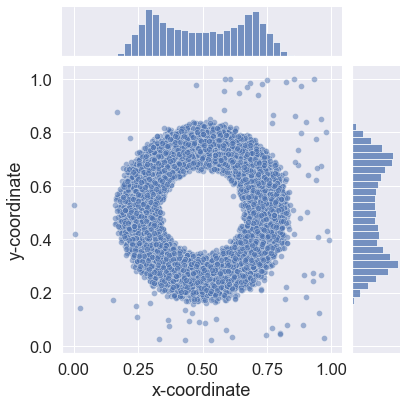

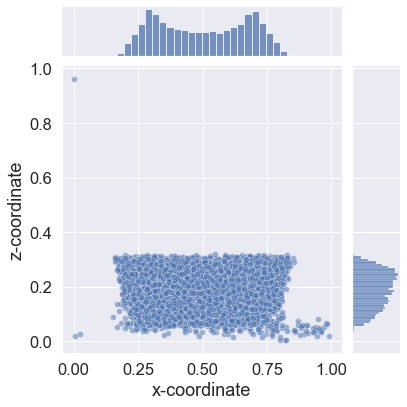

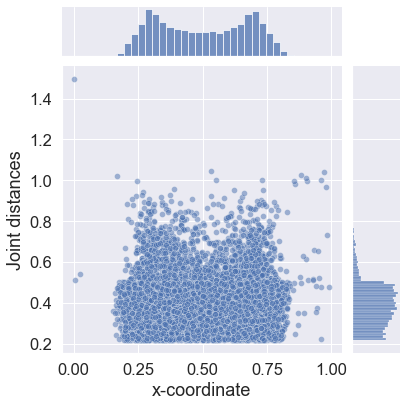

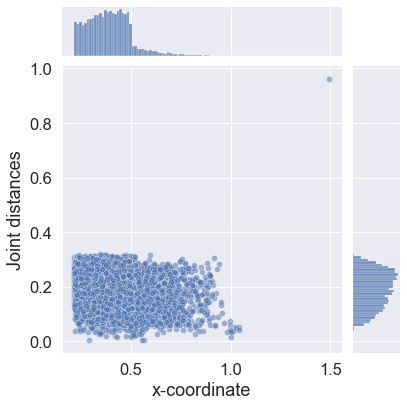

Class: 12: Mug


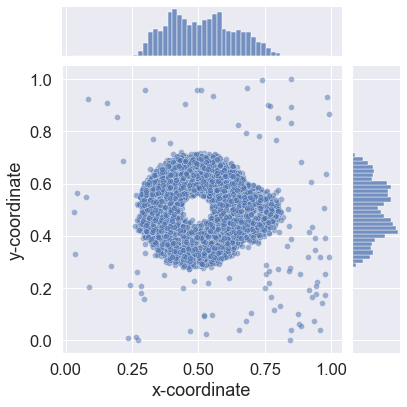

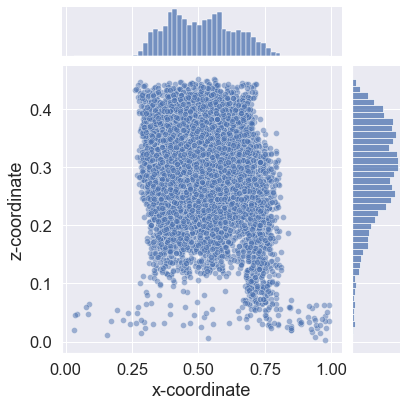

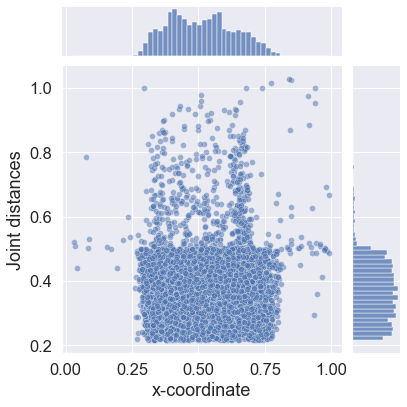

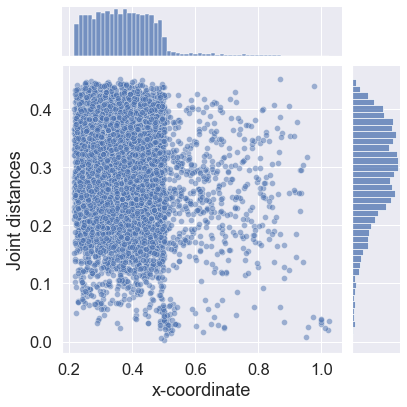

Class: 13: Duvel bottle


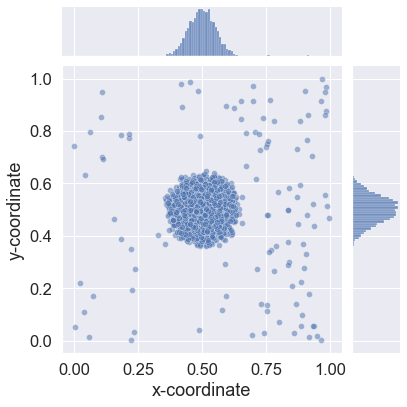

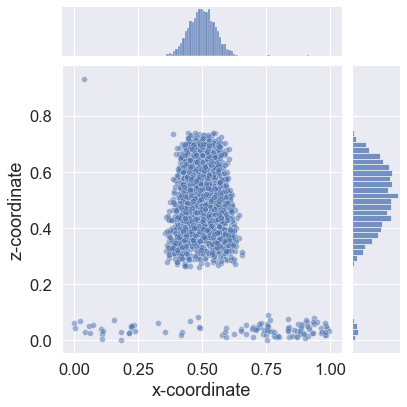

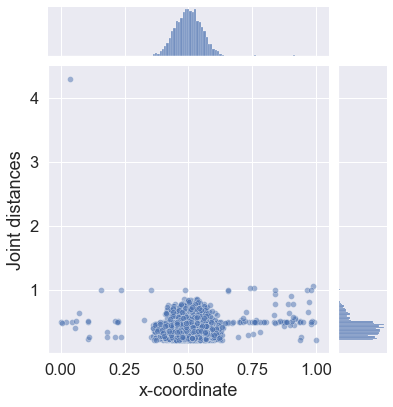

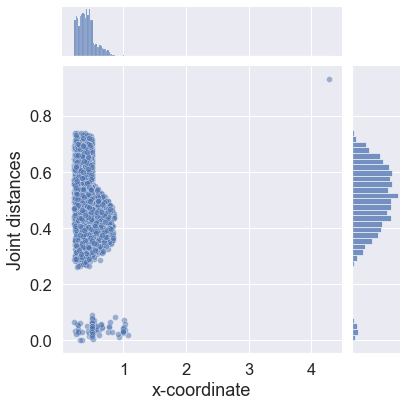

Class: 14: Liefman bottle


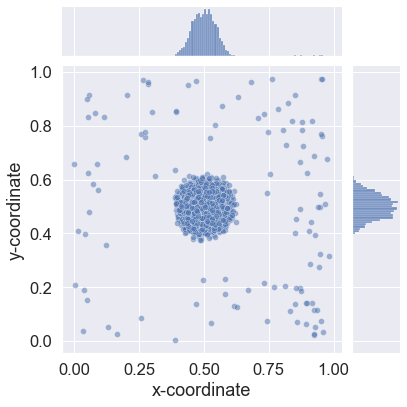

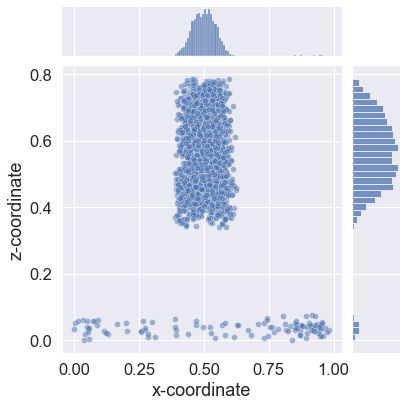

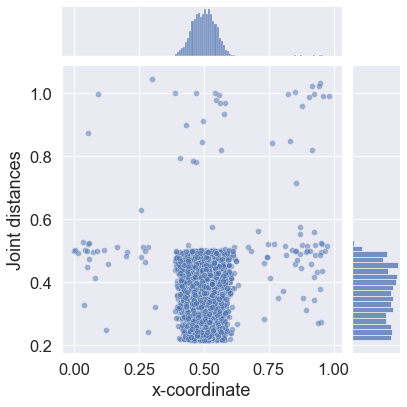

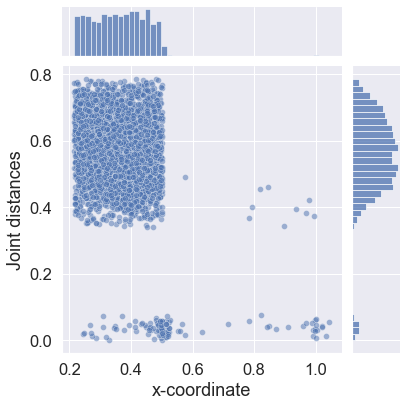

Class: 15: Wood bowl


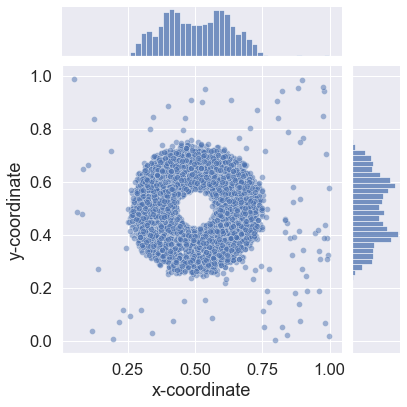

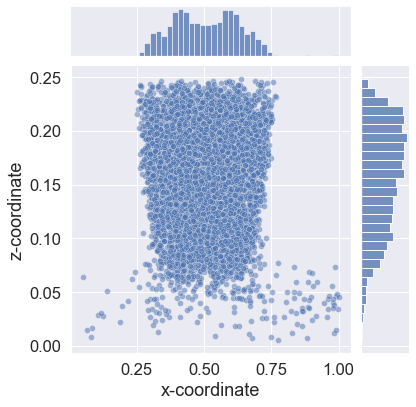

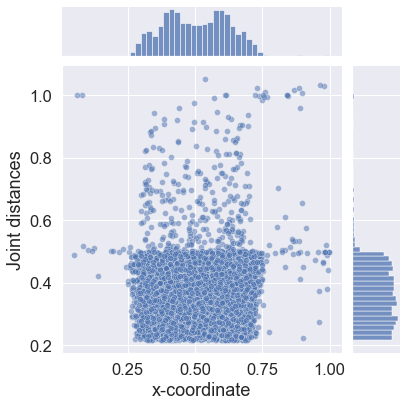

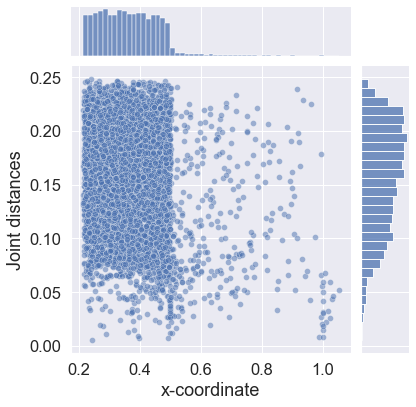

In [29]:
for class_index in range(nb_classes): 
    class_saving_str = r"C:\Users\phili\Documents\GitHub\DexterousManipulation\Figures\Data\FINAL_YCB_data_set_nzo\class_" + str(class_index)
    
    curr_class_str = "Class: " + str(class_index) + ": " + class_names[class_index]
    print(curr_class_str)
    non_zero_x = [] 
    non_zero_y = []
    non_zero_z = [] 
    non_zero_dist = []

    tmp_dist = norm_metrics_buckets[class_index]
    tmp_hand = norm_hand_infos_buckets[class_index]
    for hand_index in range(len(tmp_hand)):
        
        tmp_hand_bis = tmp_hand[hand_index]
        tmp_dist_bis = tmp_dist[hand_index]
        non_zero_x.append(tmp_hand_bis[0])
        non_zero_y.append(tmp_hand_bis[1])
        non_zero_z.append(tmp_hand_bis[2])
        non_zero_dist.append(tmp_dist_bis)
        
    sns.set(font_scale = 1.5)
    
    df = pd.DataFrame({"x-coordinate": non_zero_x, "y-coordinate": non_zero_y})
    h = sns.jointplot(data=df, x="x-coordinate", y="y-coordinate", alpha = 0.5)
    h.savefig(class_saving_str + "_Jointplot_XY_normalized.png")
    plt.show()
    
    df = pd.DataFrame({"x-coordinate": non_zero_x, "z-coordinate": non_zero_z})
    h = sns.jointplot(data=df, x="x-coordinate", y="z-coordinate", alpha = 0.5)
    h.savefig(class_saving_str + "_Jointplot_XZ_normalized.png")
    plt.show()
    
    df = pd.DataFrame({"x-coordinate": non_zero_x, "Joint distances": non_zero_dist})
    h = sns.jointplot(data=df, x="x-coordinate", y="Joint distances", alpha = 0.5)
    h.savefig(class_saving_str + "_Jointplot_TX_normalized.png")
    plt.show()
    
    df = pd.DataFrame({"x-coordinate": non_zero_dist, "Joint distances": non_zero_z})
    h = sns.jointplot(data=df, x="x-coordinate", y="Joint distances", alpha = 0.5)
    h.savefig(class_saving_str + "_Jointplot_TZ_normalized.png")
    plt.show()
    """
    
    plt.figure(figsize=(8, 6), dpi=80)
    plt.scatter(non_zero_x, non_zero_dist,  alpha = 0.5)
    plt.xlabel("x-coordinate", Fontsize = best_font_size)
    plt.ylabel("Joint distance", Fontsize = best_font_size)
    plt.xticks(fontsize=best_font_size)
    plt.yticks(fontsize=best_font_size)
    plt.title("")
    plt.savefig(class_saving_str + "_Jointplot_TX_normalized.png")
    plt.show()
    
    plt.figure(figsize=(8, 6), dpi=80)
    plt.scatter(non_zero_dist, non_zero_z,  alpha = 0.5)
    plt.xlabel("Joint distance", Fontsize = best_font_size)
    plt.ylabel("z-coordinate", Fontsize = best_font_size)
    plt.xticks(fontsize=best_font_size)
    plt.yticks(fontsize=best_font_size)
    plt.title("")
    plt.savefig(class_saving_str + "_Jointplot_TZ_NON_ZERO_normalized.png")
    plt.show()
    
    """